[View in Colaboratory](https://colab.research.google.com/github/rdenadai/DSP-Study-Notebooks/blob/master/notebooks/dsp101e.ipynb)

## DSP 101e

Experiments on Digital Signal Processing, ranging from random generated signals, voice and images!

In these experiments, we are not analysing signals in the range of DSP but also with an statistical view...

To build this document we use a lot of resources, here are some of the most important.
- References:
 - [DSP Guide](http://www.dspguide.com)
 - [Understand the Fourier transform and its applications](https://www.udemy.com/fourier-transform-mxc/)
 - [MikeXCohen Lectures](http://www.mikexcohen.com/left_toc.html)
 - [Elegant SciPy](https://github.com/elegant-scipy/elegant-scipy)
 - [DSP Tutorial](https://www.tutorialspoint.com/digital_signal_processing/index.htm)
 - [Plotly FFT Filters](https://plot.ly/python/fft-filters/)
 - [Digital Signal Processing {youtube}](https://www.youtube.com/playlist?list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et)
 - [Signal Processing 101 {youtube}](https://www.youtube.com/watch?v=KZd68xgasIU&list=PLJ-OcUCIty7evBmHvYRv66RcuziszpSFB)
 - [All Signal Processing {youtube}](https://www.youtube.com/user/allsignalprocessing/playlists)


In [0]:
import time
import math
import random
import numpy as np
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
from scipy.stats import norm
from scipy.signal import resample, hilbert
from scipy import interpolate
from scipy import fftpack
from scipy.misc import imrotate
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.display import Audio
from IPython import display
import pylab as pl

%matplotlib inline

def normalization(x, m=255):
    return (((x - min(x)) / (max(x) - min(x))) * m).astype('int64')

def normalization2(x, a, b):
    return (a + (((x - min(x)) * (b - a)) / (max(x) - min(x)))).astype('float64')

def sine(A=4096, f=1, t=1, Fs=1024, phi=0, dtype=np.int64):
    n = np.arange(Fs * t)
    return (A * np.sin((((2 * np.pi * f) * n) / Fs) + phi)).astype(dtype)

def cosine(A=4096, f=1, t=1, Fs=1024, phi=0, dtype=np.int64):
    n = np.arange(Fs * t)
    return (A * np.cos((((2 * np.pi * f) * n) / Fs) + phi)).astype(dtype)

def complex_wave(A=1, f=1, t=1, Fs=1024, phi=0):
    n = np.arange(Fs * t)
    return (A * np.exp((((2 * np.pi * f) * n) / Fs) * 1j + phi))

def load_image_from_url(url): 
    try:
        res = requests.get(url)
        if res.status_code == 200:
            img = np.array(Image.open(BytesIO(res.content)))
            s = img.shape
            if len(s) > 2:
                x, y, z = img.shape
                if z > 3:
                    img = img[:,:,:3]
            return img
    except Exception as e:
        print('Error: ', str(e))
    return np.array([])

### 2D FFT

FFT can be used to observe signals in 2D plane, like images, remember that a signal *"is a function that 'conveys information about the behavior or attributes of some phenomenon'."*[wiki](https://en.wikipedia.org/wiki/Signal)

This means that we could use the concepts view in Digital Signal Processing applying to images. This is a major topic in computer science and there's a repo that explain about other topics related to Digital Image Processing.

Anyway, the main focus here is to demonstrate the use of FFT in images.

To be clear, the default way to observe amplitude and phase spectrum of images is to centralize all that information. To do this the correct way is to shift the low frequencies of the image to the center, and high frequencies to the corners. When taken the FFT the inverse appears since to calculate the FFT of 2 dimentions, one must first calculate the FFT of the columns and after that calculate the FFT for the lines with the values of previous calculate columns.

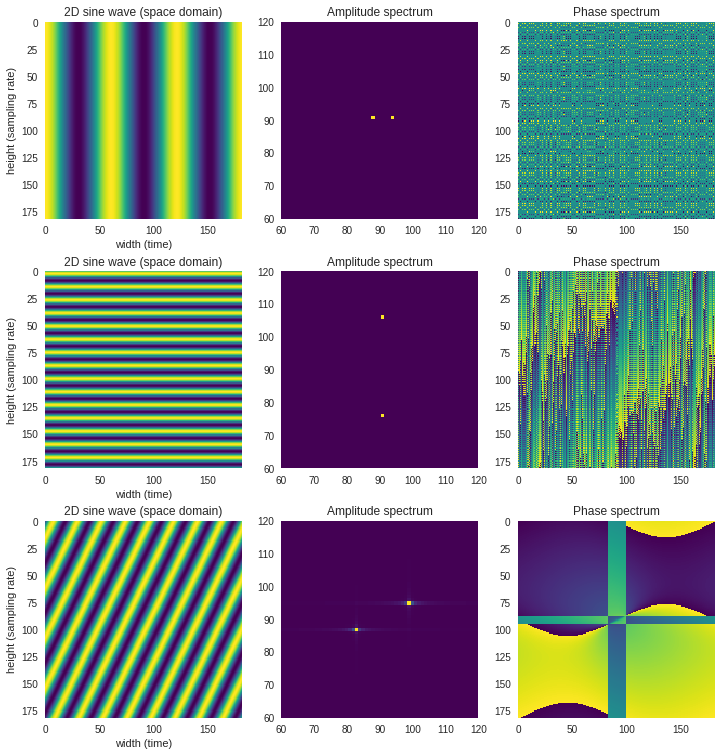

In [267]:
m = 182 / 2
sec = 2
w, h = m * sec, m * sec
t, Fs = w, h

x = sine(A=1, f=3, t=t, Fs=Fs, phi=np.pi/2, dtype=np.float32).reshape(h, w)
X = fftpack.fftshift(fftpack.fftn(x))
amp = np.abs(X)
ang = np.angle(X)

x2 = np.rot90(sine(A=1, f=15, t=t, Fs=Fs, phi=np.pi, dtype=np.float32).reshape(h, w))
X2 = fftpack.fftshift(fftpack.fftn(x2))
amp2 = np.abs(X2)
ang2 = np.angle(X2)

lims  = [-91,91]
[k, l] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))
xp  = k * np.cos(np.pi/7) + l * np.sin(np.pi/7)
x3 = np.sin(2 * np.pi * .05 * xp )

X3 = fftpack.fftshift(fftpack.fftn(x3))
amp3 = np.abs(X3)
ang3 = np.angle(X3)

plt.figure(figsize=(12, 13))
plt.subplot(331)
plt.title('2D sine wave (space domain)')
plt.xlabel('width (time)')
plt.ylabel('height (sampling rate)')
plt.imshow(x, cmap='viridis')
plt.grid(False)
plt.subplot(332)
plt.title('Amplitude spectrum')
plt.imshow(amp, cmap='viridis')
plt.xlim([60,120])
plt.ylim([60,120])
plt.grid(False)
plt.subplot(333)
plt.title('Phase spectrum')
plt.imshow(ang, cmap='viridis')
plt.grid(False)

plt.subplot(334)
plt.title('2D sine wave (space domain)')
plt.xlabel('width (time)')
plt.ylabel('height (sampling rate)')
plt.imshow(x2, cmap='viridis')
plt.grid(False)
plt.subplot(335)
plt.title('Amplitude spectrum')
plt.imshow(amp2, cmap='viridis')
plt.xlim([60,120])
plt.ylim([60,120])
plt.grid(False)
plt.subplot(336)
plt.title('Phase spectrum')
plt.imshow(ang2, cmap='viridis')
plt.grid(False)

plt.subplot(337)
plt.title('2D sine wave (space domain)')
plt.xlabel('width (time)')
plt.ylabel('height (sampling rate)')
plt.imshow(x3, cmap='viridis')
plt.grid(False)
plt.subplot(338)
plt.title('Amplitude spectrum')
plt.imshow(amp3, cmap='viridis')
plt.xlim([60,120])
plt.ylim([60,120])
plt.grid(False)
plt.subplot(339)
plt.title('Phase spectrum')
plt.imshow(ang3, cmap='viridis')
plt.grid(False)

plt.show()

Important to notice the above code and **amplitude spectrum** of the images. The phase spectrum does change but we could not interpret this, that's not the case when we observe the amplitude spectrum of the images.

More complex images (complex in terms of more points and angle directions, not in term of complex numbers) show a more complicated **amplitude spectrum** allowing us to observe different low and high frequencies.

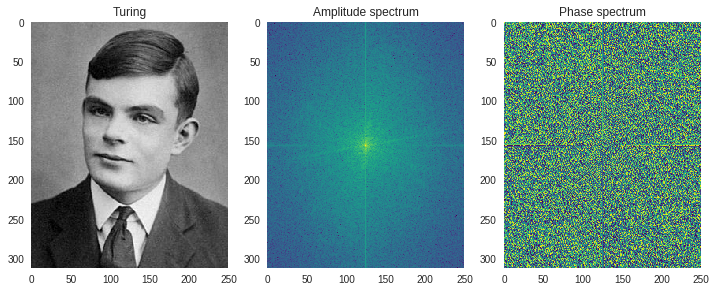

In [311]:
img = load_image_from_url('https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Alan_Turing_Aged_16_%28cropped%29.jpg/250px-Alan_Turing_Aged_16_%28cropped%29.jpg')

imgX = fftpack.fftshift(fftpack.fftn(img))
amp = np.abs(imgX)
ang = np.angle(imgX)

plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.title('Turing')
plt.imshow(img, cmap='gray')
plt.grid(False)
plt.subplot(132)
plt.title('Amplitude spectrum')
plt.imshow(np.log(1 + amp), cmap='viridis')
plt.grid(False)
plt.subplot(133)
plt.title('Phase spectrum')
plt.imshow(ang, cmap='viridis')
plt.grid(False)
plt.show()

Each image could present different FFT patterns. Bellow is the comparition of a square, cross and circle.

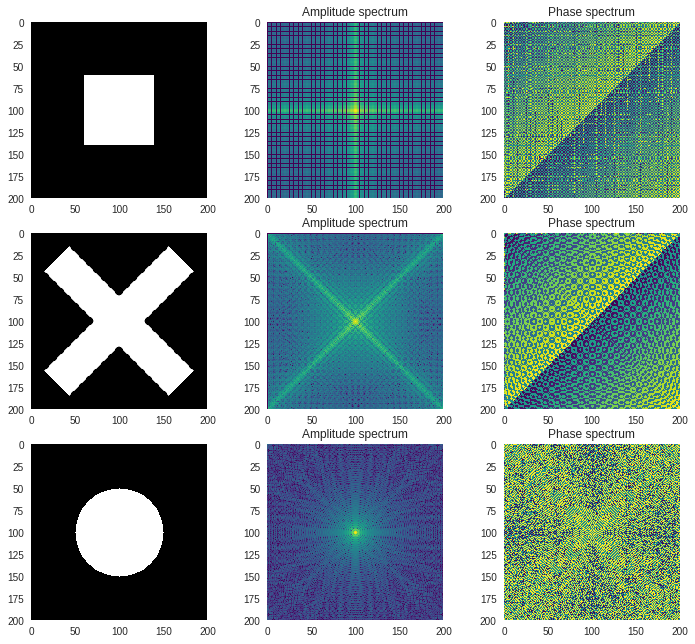

In [310]:
s, cr = np.zeros([200, 200]), np.zeros([200, 200])
s[60:140, 60:140] = 255

cr[::, 80:120] = 255
cr[80:120:,:] = 255
cr = imrotate(cr, 45)

r, c = np.indices((200, 200))
cl = (r - 100)**2 + (c - 100)**2 <= 50**2

S = fftpack.fftshift(fftpack.fftn(s))
amp_s = np.log(1 + np.abs(S))
ang_s = np.angle(S)

CR = fftpack.fftshift(fftpack.fftn(cr))
amp_cr = np.log(1 + np.abs(CR))
ang_cr = np.angle(CR)

CL = fftpack.fftshift(fftpack.fftn(cl))
amp_cl = np.log(1 + np.abs(CL))
ang_cl = np.angle(CL)

plt.figure(figsize=(12, 11))
plt.subplot(331)
plt.imshow(s, cmap='gray')
plt.grid(False)
plt.subplot(332)
plt.title('Amplitude spectrum')
plt.imshow(amp_s, cmap='viridis')
plt.grid(False)
plt.subplot(333)
plt.title('Phase spectrum')
plt.imshow(ang_s, cmap='viridis')
plt.grid(False)
plt.subplot(334)
plt.imshow(cr, cmap='gray')
plt.grid(False)
plt.subplot(335)
plt.title('Amplitude spectrum')
plt.imshow(amp_cr, cmap='viridis')
plt.grid(False)
plt.subplot(336)
plt.title('Phase spectrum')
plt.imshow(ang_cr, cmap='viridis')
plt.grid(False)
plt.subplot(337)
plt.imshow(cl, cmap='gray')
plt.grid(False)
plt.subplot(338)
plt.title('Amplitude spectrum')
plt.imshow(amp_cl, cmap='viridis')
plt.grid(False)
plt.subplot(339)
plt.title('Phase spectrum')
plt.imshow(ang_cl, cmap='viridis')
plt.grid(False)
plt.show()